In [7]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ['/public/home/mowp/test/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [8]:
import re
import sys
sys.path.append('/public1/mowp/workspace/nanopore_modification/scripts/')

%load_ext autoreload
%autoreload 1
%aimport single_read_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np

In [10]:
infile = '/data/Zhaijx/mowp/db/col-CEN/bed/tel_region.bed'
tel_region = {}
with open(infile) as f:
    for line in f:
        line = line.strip().split('\t')
        tel_region[line[3]] = (line[0], int(line[1]), int(line[2]))

In [12]:
def get_tel_region_pos(tel_name, extend: int = 2000):
    chrom, start, end = tel_region[tel_name]
    if tel_name[-1] == 'L':
        return chrom, start, end+extend
    else:
        return chrom, start-extend, end

In [13]:
# threshold = 0.9

infiles = {
    'wt1208':[
        '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221208_col_m6A/6ma_results/20221208_col_m6A.6mA_genome_pos.tsv.gz',
        '/data/Zhaijx/mowp/data/stam_seq_col_CEN/test/20221208_col_m6A.5mC_genome_pos.tsv.gz',
    ],
}

In [14]:
bamfiles = {
    'wt1208': '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221208_col_m6A/aligned_data/20221208_col_m6A.sorted.q2.1kb.bam',
}

# WT

In [16]:
tel_name = 'Tel5L'
chrom, start, end = get_tel_region_pos(tel_name, extend=1000)

In [17]:
name = 'wt1208'
read_set = single_read_plot.preprocessing(infiles[name],  (0, 1), chrom, start, end, bam=bamfiles[name])
len(read_set)

272

In [18]:
read_plot = single_read_plot.Single_Read(chrom, start, end)

gene_bed = '/data/Zhaijx/mowp/db/col-CEN/bed/tel_region.bed.gz'
read_plot.add_gene_model(gene_bed, arrow=False, annotation_pos=None, small_arrow=False, y_space=5, track_height=2, gene_color='grey')

bw_track_height = 1.2
read_width = 1
fully_span = False
left_span=False
right_span=True
mod_track_height = 6
stranded = True
expand = 0
read_soft_clip = None
start_before = tel_region[tel_name][2]

read_plot.add_mod_results(
    infiles[name][0],
    read_set = read_set,
    fully_span=fully_span, left_span=left_span, right_span=right_span, stranded=stranded, expand=expand, sort=True,
    methylated_color='#52af4c', bw_color='#52af4c', data_range=(0, .3), bw_track_height=bw_track_height, read_width=read_width, mod_track_height=mod_track_height, soft_clip=read_soft_clip, start_before=start_before)
    
read_plot.add_mod_results(
    infiles[name][1].replace('5mC', 'CG'),
    read_set = read_set,
    fully_span=fully_span, left_span=left_span, right_span=right_span, stranded=stranded, expand=expand, sort=True,
    methylated_color='#104e8b', bw_color='#104e8b', data_range=(0, 1), bw_track_height=bw_track_height, read_width=read_width, mod_track_height=mod_track_height, soft_clip=read_soft_clip, start_before=start_before)

read_plot.add_mod_results(
    infiles[name][1].replace('5mC', 'CHG'),
    read_set = read_set,
    fully_span=fully_span, left_span=left_span, right_span=right_span, stranded=stranded, expand=expand, sort=True,
    methylated_color='#1e7cff', bw_color='#1e7cff', data_range=(0, 1), bw_track_height=bw_track_height, read_width=read_width, mod_track_height=mod_track_height, soft_clip=read_soft_clip, start_before=start_before)

read_plot.add_mod_results(
    infiles[name][1].replace('5mC', 'CHH'),
    read_set = read_set,
    fully_span=fully_span, left_span=left_span, right_span=right_span, stranded=stranded, expand=expand, sort=True,
    methylated_color='#03c4ff', bw_color='#03c4ff', data_range=(0, 1), bw_track_height=bw_track_height, read_width=read_width, mod_track_height=mod_track_height, soft_clip=read_soft_clip, start_before=start_before)

# read_plot.cluster_reads()
# read_plot.sorted_reads(by=1, ascending=False)

# read_plot.summary()

Chr5:1-3605
length: 3604
mod_tracks: mod_1, mod_2, mod_3, mod_4, mod_5, mod_6, mod_7, mod_8
bw_tracks: 


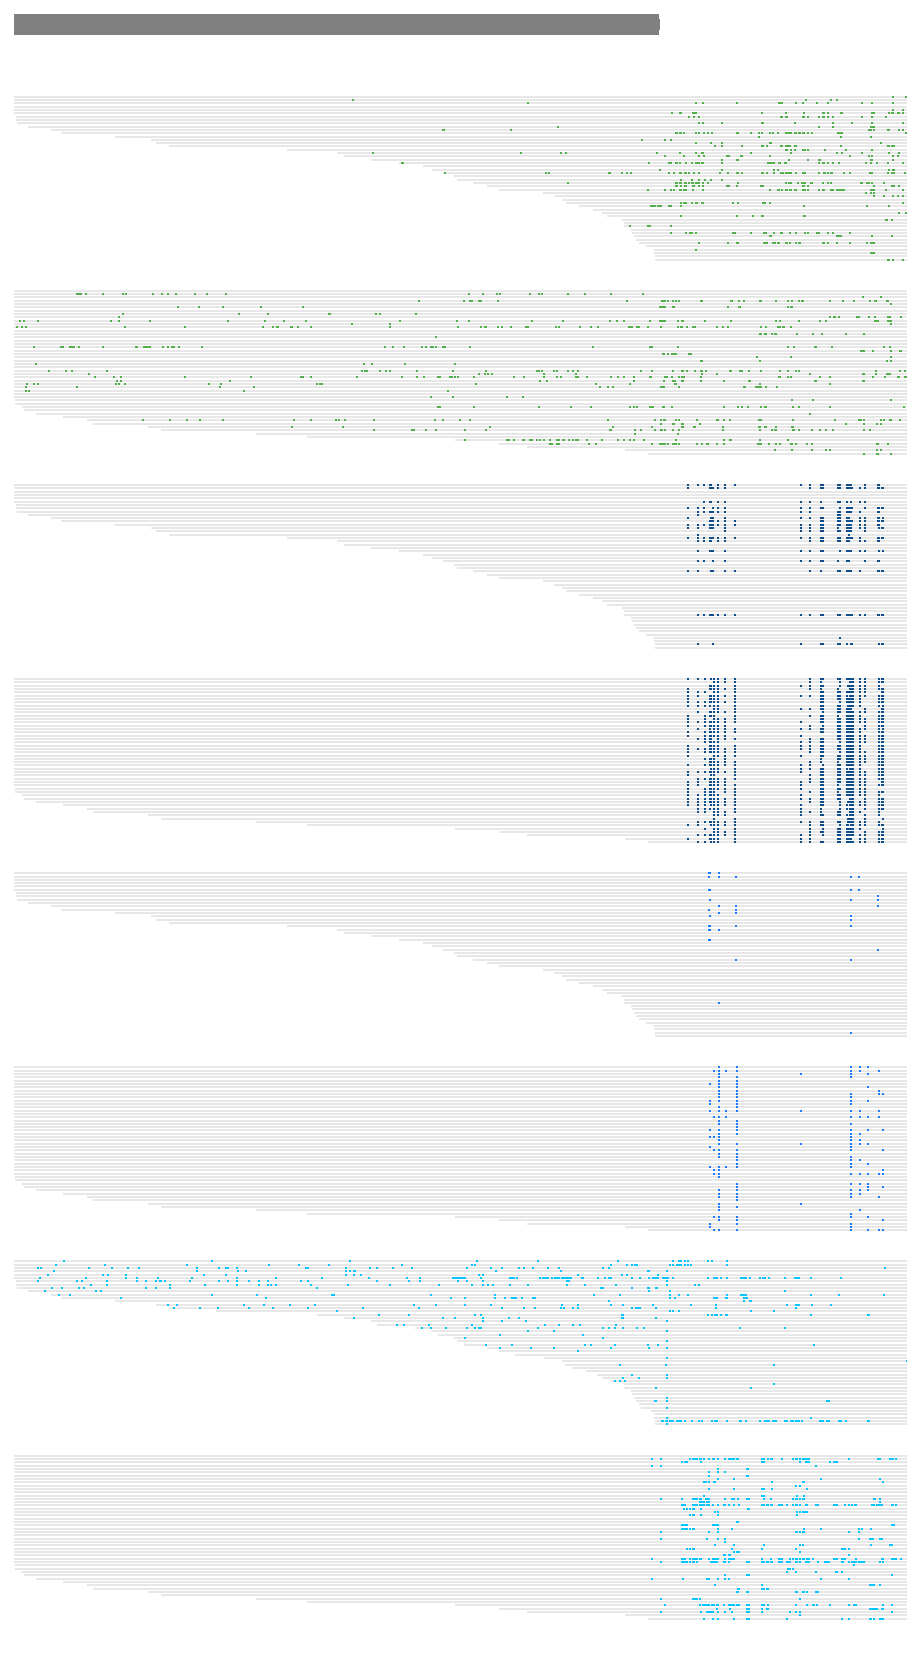

In [20]:
# full-size

axes = read_plot.plot(
    figsize=(8, 15), hspace=.1, xticks=False, subsample=50,
    bw_tracks_set={}, 
    # mod_tracks_set={0, 1, 6, 7}, 
    plot_order=('plot_gene_model', 'plot_bw', 'plot_mod'));

read_plot.summary()

Chr5:1-3605
length: 3604
mod_tracks: mod_1, mod_2, mod_3, mod_4, mod_5, mod_6, mod_7, mod_8
bw_tracks: 


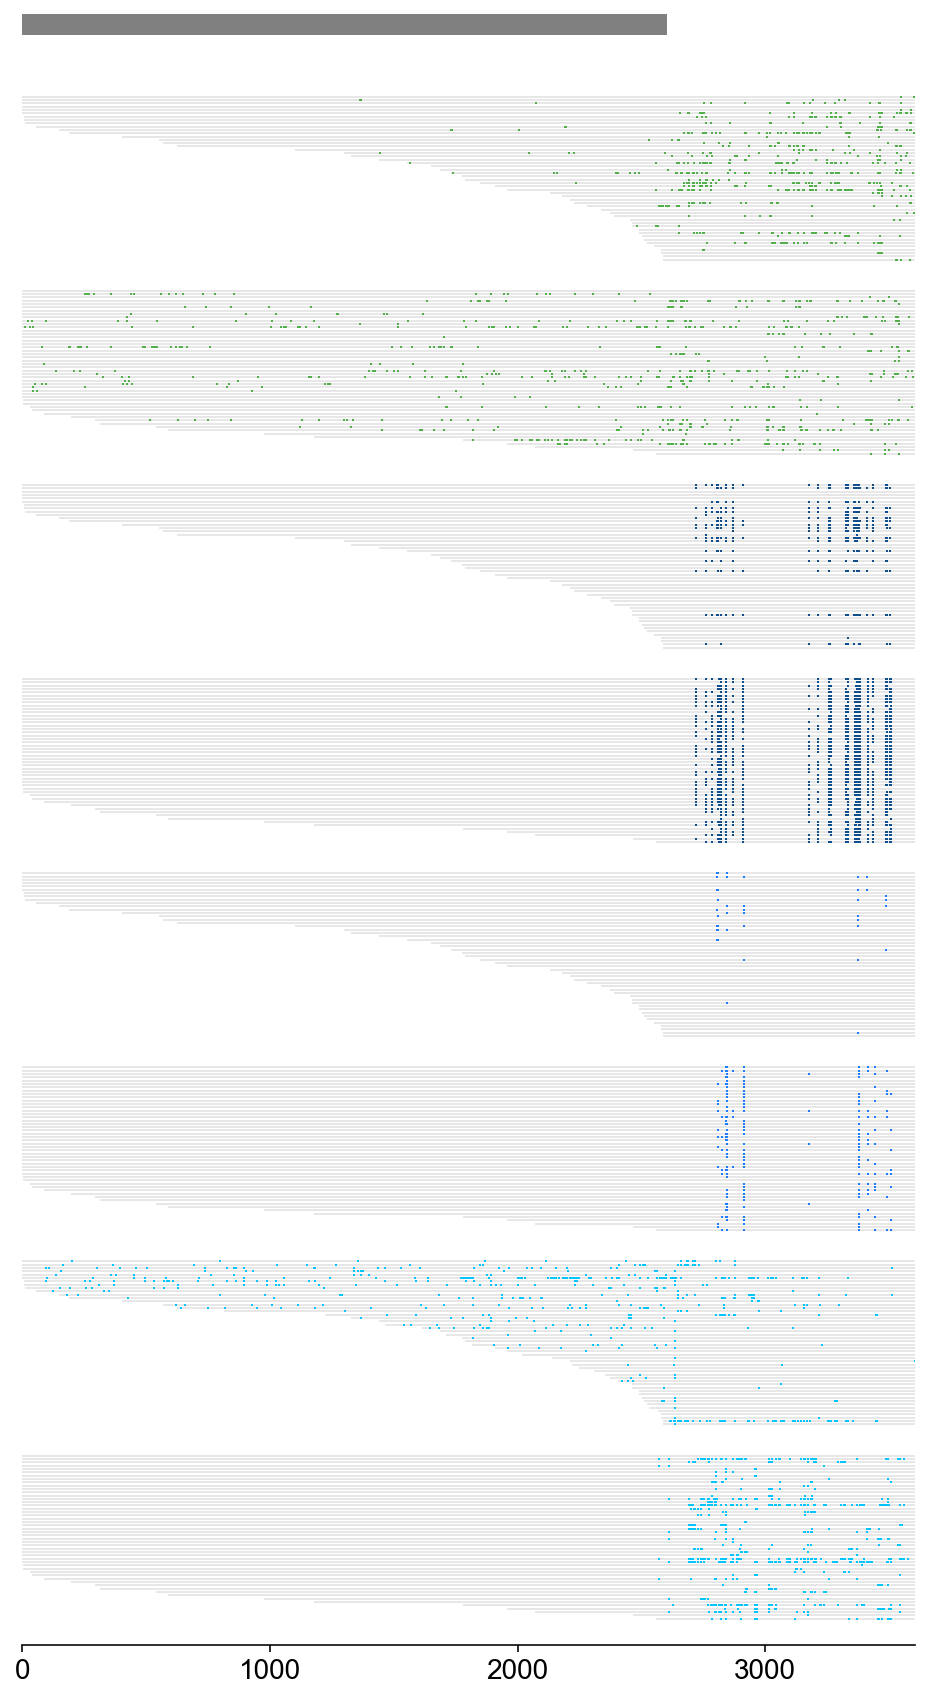

In [21]:
# full-size

axes = read_plot.plot(
    figsize=(8, 15), hspace=.1, xticks=True, subsample=50,
    bw_tracks_set={}, 
    # mod_tracks_set={0, 1, 6, 7}, 
    plot_order=('plot_gene_model', 'plot_bw', 'plot_mod'));

ax = axes[-1]
ax.set_xticks([0, 1000, 2000, 3000])
ax.set_xticklabels([0, 1000, 2000, 3000], fontsize=14)
read_plot.summary()